#
IMPORT STATEMENTS

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#
DATA READING AND ANALYSIS

In [4]:
data = pd.read_csv("/Users/thahsin/Downloads/IBM-Project-19316-1659696089-main/Project Development Phase/Sprint 3/dataset/Admission_Predict.csv")

In [5]:
data.drop(["Serial No."], axis=1, inplace=True)

In [6]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [9]:
data.isnull().sum() 

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

#
VISUALIZATION

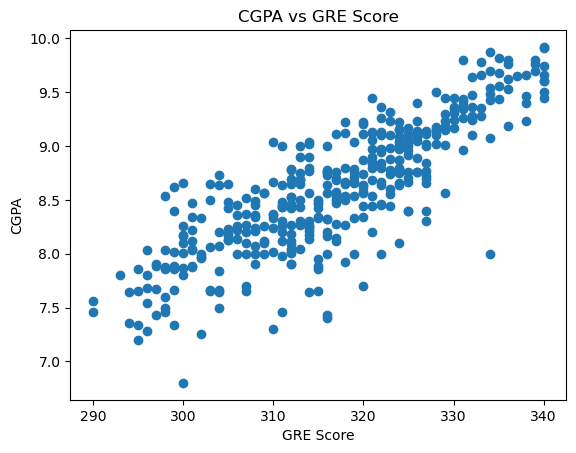

In [10]:
plt.scatter(data['GRE Score'],data['CGPA'])
plt.title('CGPA vs GRE Score')
plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.show()

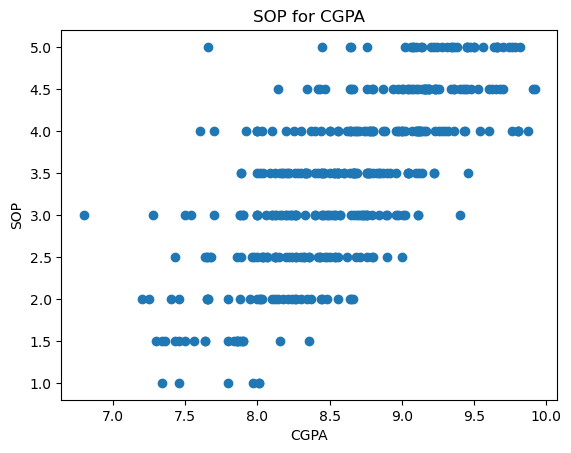

In [11]:
plt.scatter(data['CGPA'],data['SOP'])
plt.title('SOP for CGPA')
plt.xlabel('CGPA')
plt.ylabel('SOP')
plt.show()

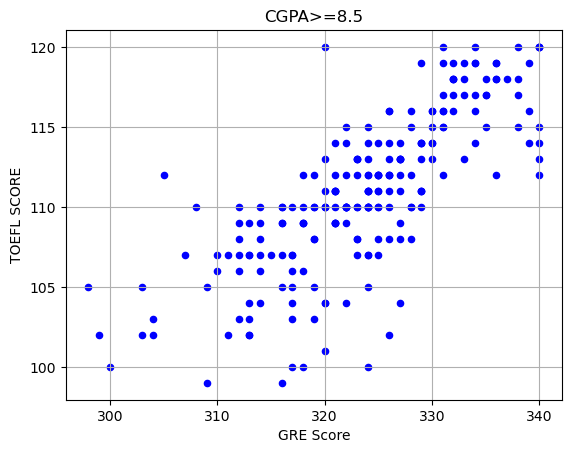

In [12]:
data[data.CGPA >= 8.5].plot(kind='scatter', x='GRE Score', y='TOEFL Score',color="BLUE")

plt.xlabel("GRE Score")
plt.ylabel("TOEFL SCORE")
plt.title("CGPA>=8.5")
plt.grid(True)

plt.show()

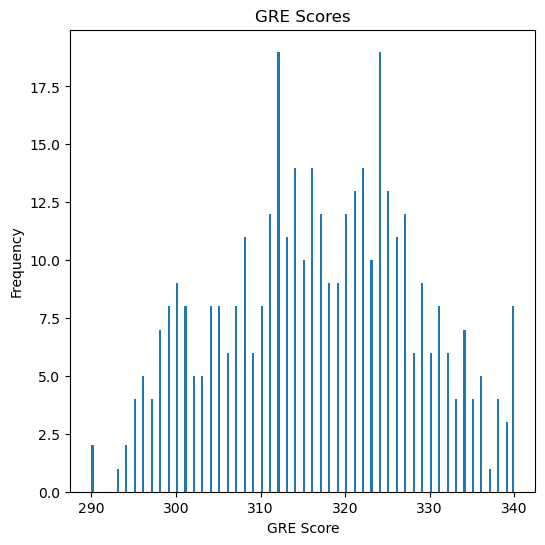

In [13]:
data["GRE Score"].plot(kind = 'hist',bins = 200,figsize = (6,6))

plt.title("GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("Frequency")

plt.show()

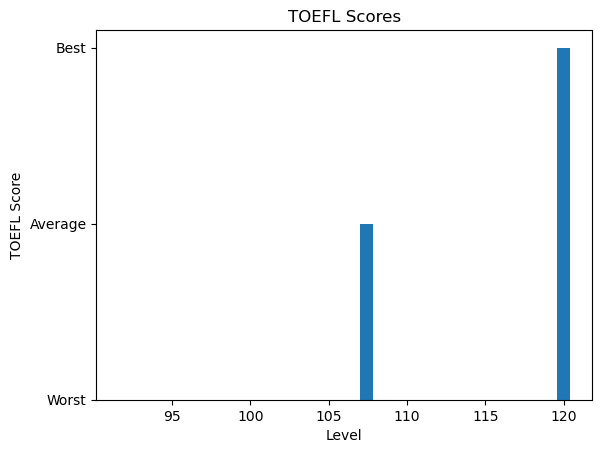

In [14]:
p = np.array([data["TOEFL Score"].min(),data["TOEFL Score"].mean(),data["TOEFL Score"].max()])
r = ["Worst","Average","Best"]
plt.bar(p,r)

plt.title("TOEFL Scores")
plt.xlabel("Level")
plt.ylabel("TOEFL Score")

plt.show()

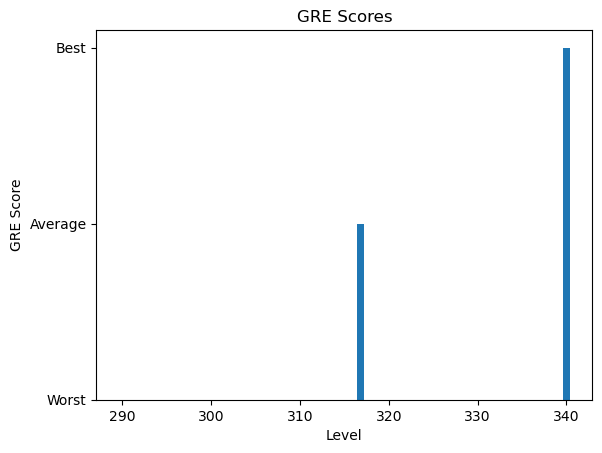

In [15]:
g = np.array([data["GRE Score"].min(),data["GRE Score"].mean(),data["GRE Score"].max()])
h = ["Worst","Average","Best"]
plt.bar(g,h)

plt.title("GRE Scores")
plt.xlabel("Level")
plt.ylabel("GRE Score")

plt.show()

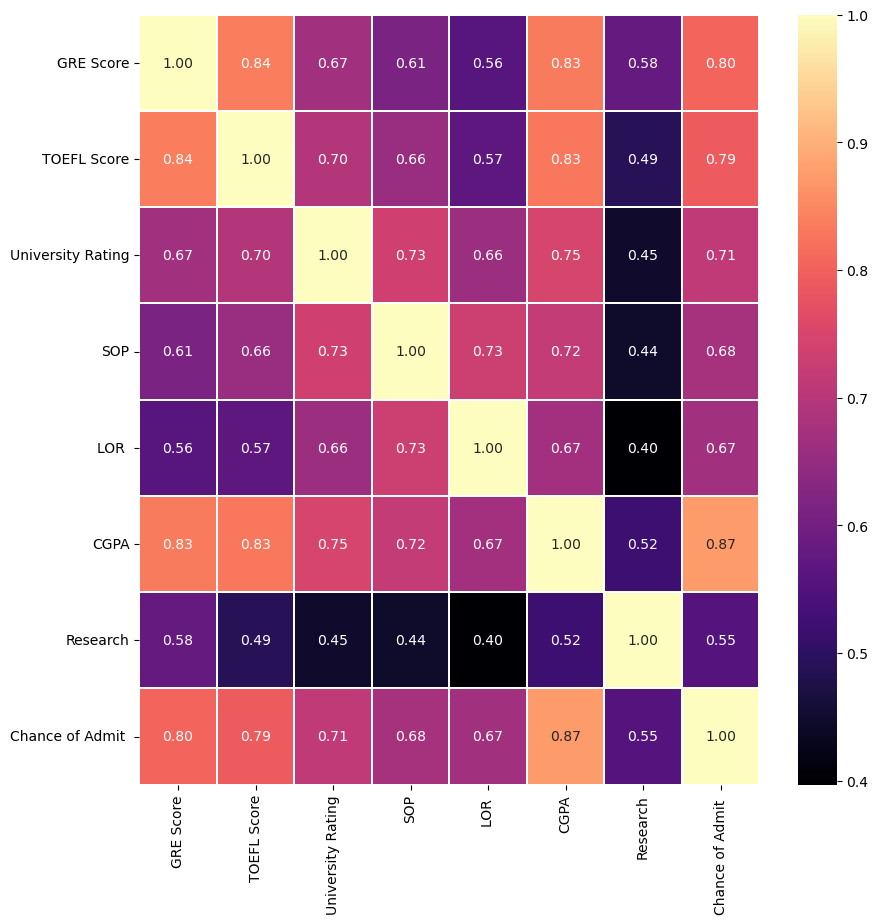

In [16]:
plt.figure(figsize=(10, 10))

sns.heatmap(data.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")

plt.show()

<AxesSubplot:xlabel='University Rating', ylabel='count'>

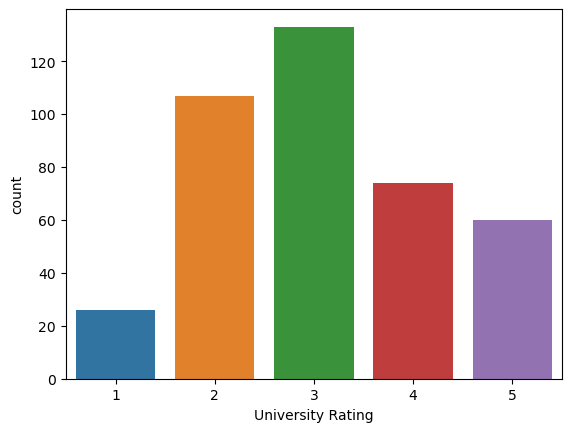

In [17]:
data.Research.value_counts()

sns.countplot(x="University Rating",data=data)

<AxesSubplot:xlabel='University Rating', ylabel='Chance of Admit '>

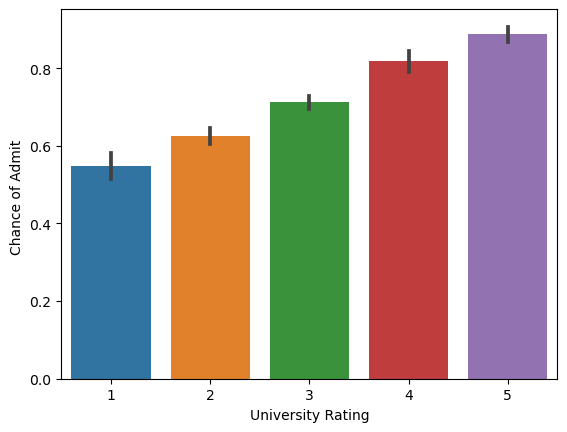

In [18]:
sns.barplot(x="University Rating", y="Chance of Admit ", data=data)

#
TRAIN-TEST SPLIT

In [19]:
X=data.drop(['Chance of Admit '],axis=1) #input data_set
y=data['Chance of Admit '] #output labels

In [20]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

#
MODELING AND TRAINING

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
145,0.60,0.750000,0.25,0.250,0.375,0.529412,1.0
46,0.78,0.785714,1.00,0.750,1.000,0.772059,1.0
36,0.18,0.500000,0.25,0.750,0.750,0.441176,0.0
387,0.34,0.464286,0.25,0.250,0.625,0.330882,0.0
316,0.16,0.321429,0.25,0.125,0.250,0.242647,0.0


In [22]:
from sklearn.ensemble import GradientBoostingRegressor
rgr = GradientBoostingRegressor()
rgr.fit(X_train,y_train)

GradientBoostingRegressor()

In [23]:
rgr.score(X_test,y_test)

0.6602629134151765

In [24]:
y_predict=rgr.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import numpy as np
print('Mean Absolute Error:', mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 0.05740493116655876
Mean Squared Error: 0.006601195400897355
Root Mean Squared Error: 0.08124774089719268


In [26]:
y_train = (y_train>0.5)
y_test = (y_test>0.5)

In [27]:
from sklearn.linear_model._logistic import LogisticRegression

lore = LogisticRegression(random_state=0, max_iter=1000)

lr = lore.fit(X_train, y_train)

In [28]:
y_pred = lr.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

print('Accuracy Score:', accuracy_score(y_test, y_pred))  
print('Recall Score:', recall_score(y_test, y_pred))  
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))
print('Confussion Matrix:\n', confusion_matrix(y_test, y_pred))


Accuracy Score: 0.8833333333333333
Recall Score: 1.0
ROC AUC Score: 0.5
Confussion Matrix:
 [[ 0  7]
 [ 0 53]]


#
SAVING THE MODELS

In [30]:
# import pickle

In [31]:
# pickle.dump(lr, open("university.pkl", "wb")) #logistic regression model
# pickle.dump(rgr, open("university_percent.pkl", "wb")) #regression model

#
HOSTING THE MODEL

In [32]:
import pickle


In [33]:
lr = pickle.load(open("university.pkl", "rb")) #logistic regression model
gd = pickle.load(open("university_percent.pkl", "rb")) #regression model

/Users/thahsin/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


FileNotFoundError: [Errno 2] No such file or directory: 'university_percent.pkl'

In [34]:
from ibm_watson_machine_learning import APIClient

ModuleNotFoundError: No module named 'ibm_watson_machine_learning'

In [35]:
uml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "wf8mge_OQdwVO8ao2kmWCtfxOfLWl8442SH44V85v2Ls"
}

client = APIClient(uml_credentials)

NameError: name 'APIClient' is not defined

In [36]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    idr = []
    for i in space['resources']:
        idr.append(i['metadata']['id'])
    return idr    
    

In [37]:
space_uid = guid_from_space_name(client, "IBMprojectmodels")
print(space_uid[0])

NameError: name 'client' is not defined

In [38]:
client.set.default_space(space_uid[0])

NameError: name 'client' is not defined

In [39]:
client.software_specifications.list()

NameError: name 'client' is not defined

In [40]:
software_uid = client.software_specifications.get_uid_by_name('default_py3.7')
print(software_uid)
meta_props={
     client.repository.ModelMetaNames.NAME: "logistic_model",
     client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_uid,
     client.repository.ModelMetaNames.TYPE: "scikit-learn_0.23"
}

NameError: name 'client' is not defined

In [41]:
model_details = client.repository.store_model(model=lr, meta_props=meta_props, training_data=None)

NameError: name 'client' is not defined